In [ ]:
# Import the library
import numpy as np
import pandas as pd
import pandas.util.testing as tm
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


In [ ]:
pd.__version__

'1.3.5'

In [ ]:
import sys
sys.version

'3.7.13 (default, Apr 24 2022, 01:04:09) \n[GCC 7.5.0]'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Magisterka/MGR_Wyniki.csv',header=[0,1], sep=';')
df.head()

,Metryka,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Złość - emocje,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 110_level_0,Unnamed: 111_level_0,Unnamed: 112_level_0,Unnamed: 113_level_0,Unnamed: 114_level_0,Unnamed: 115_level_0,Unnamed: 116_level_0,Unnamed: 117_level_0,Unnamed: 118_level_0,Unnamed: 119_level_0
,Płeć,Wiek,Ile czasu w tygodniu spędzasz grając w gry komputerowe?,"Wybierz, które określenia najbardziej odpowiadają twoim ulubionym gatunkom gier:",Gdzie mieszkasz?,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,...,Czułem się usatysfakcjonowany,Poczułem się zdezorientowany,Czułem się wyczerpany,"Poczułem, że mogłem zrobić więcej pożytecznych rzeczy",Czułem się potężny,Czułem się zmęczony,Poczułem żal,Było mi wstyd,Czułem się dumny,"Miałem wrażenie, że wróciłem z podróży"
0,Mężczyzna,24,Mniej niż 2h w tygodniu,"RPG,FPS,Akcja",Miasto > 500 tyś mieszkańców,1,5,5,2,2,...,Wcale,Wcale,Wcale,Wcale,Wcale,Lekko,Mocno,Wcale,Wcale,Wcale
1,Mężczyzna,24,2 - 8h w tygodniu,"FPS,RTS,MMO",Wieś,1,7,5,2,4,...,Wcale,Średnio,Średnio,Wcale,Wcale,Średnio,Mocno,Lekko,Wcale,Lekko
2,Mężczyzna,24,> 8h w tygodniu,MMO,Miasto 50 - 150 tyś mieszkańców,4,3,1,5,6,...,Wcale,Średnio,Mocno,Wcale,Wcale,Lekko,Ekstremalnie,Ekstremalnie,Wcale,Wcale
3,Mężczyzna,22,2 - 8h w tygodniu,"RPG,FPS,Akcja,Przygoda,Platformowa,Rogue-Like",Miasto 150 - 500 tyś mieszkańców,4,5,1,1,3,...,Wcale,Wcale,Wcale,Wcale,Wcale,Wcale,Mocno,Wcale,Wcale,Wcale
4,Mężczyzna,22,> 8h w tygodniu,"RPG,FPS,Przygoda,Rogue-Like",Miasto 50 - 150 tyś mieszkańców,2,5,1,1,3,...,Wcale,Lekko,Średnio,Wcale,Wcale,Lekko,Lekko,Wcale,Wcale,Wcale


In [ ]:
#Odpowiednia dwupoziomowość Dataframe
a = df.columns.get_level_values(0).to_series()
b = a.mask(a.str.startswith('Unnamed')).ffill().fillna('')
df.columns = [b, df.columns.get_level_values(1)]
df.head()

Metryka                                                               \
        Płeć Wiek Ile czasu w tygodniu spędzasz grając w gry komputerowe?   
0  Mężczyzna   24                            Mniej niż 2h w tygodniu        
1  Mężczyzna   24                                  2 - 8h w tygodniu        
2  Mężczyzna   24                                    > 8h w tygodniu        
3  Mężczyzna   22                                  2 - 8h w tygodniu        
4  Mężczyzna   22                                    > 8h w tygodniu        

                                                                                    \
  Wybierz, które określenia najbardziej odpowiadają twoim ulubionym gatunkom gier:   
0                                      RPG,FPS,Akcja                                 
1                                        FPS,RTS,MMO                                 
2                                                MMO                                 
3      RPG,FPS,Akcja,Przygoda,Platformowa,Rogue-Like                                 
4                        RPG,FPS,Przygoda,Rogue-Like                                 

                                    Złość - emocje                           \
                   Gdzie mieszkasz?         Radość Złość Smutek Obrzydzenie   
0      Miasto > 500 tyś mieszkańców              1     5      5           2   
1                              Wieś              1     7      5           2   
2   Miasto 50 - 150 tyś mieszkańców              4     3      1           5   
3  Miasto 150 - 500 tyś mieszkańców              4     5      1           1   
4   Miasto 50 - 150 tyś mieszkańców              2     5      1           1   

               ...                  Smutek - GEQ                               \
  Zaskoczenie  ... Czułem się usatysfakcjonowany Poczułem się zdezorientowany   
0           2  ...                         Wcale                        Wcale   
1           4  ...                         Wcale                      Średnio   
2           6  ...                         Wcale                      Średnio   
3           3  ...                         Wcale                        Wcale   
4           3  ...                         Wcale                        Lekko   

                                                                               \
  Czułem się wyczerpany Poczułem, że mogłem zrobić więcej pożytecznych rzeczy   
0                 Wcale                                              Wcale      
1               Średnio                                              Wcale      
2                 Mocno                                              Wcale      
3                 Wcale                                              Wcale      
4               Średnio                                              Wcale      

                                                                      \
  Czułem się potężny Czułem się zmęczony  Poczułem żal Było mi wstyd   
0              Wcale               Lekko         Mocno         Wcale   
1              Wcale             Średnio         Mocno         Lekko   
2              Wcale               Lekko  Ekstremalnie  Ekstremalnie   
3              Wcale               Wcale         Mocno         Wcale   
4              Wcale               Lekko         Lekko         Wcale   

                                                           
  Czułem się dumny Miałem wrażenie, że wróciłem z podróży  
0            Wcale                                  Wcale  
1            Wcale                                  Lekko  
2            Wcale                                  Wcale  
3            Wcale                                  Wcale  
4            Wcale                                  Wcale  

[5 rows x 120 columns]

In [ ]:
df.describe()

Metryka Złość - emocje                                                \
            Wiek         Radość      Złość     Smutek Obrzydzenie Zaskoczenie   
count  30.000000      30.000000  30.000000  30.000000   30.000000   30.000000   
mean   25.200000       2.000000   4.966667   1.600000    1.766667    3.600000   
std     4.196879       1.339068   1.956128   1.248447    1.278019    1.868062   
min    20.000000       1.000000   1.000000   1.000000    1.000000    1.000000   
25%    23.000000       1.000000   4.000000   1.000000    1.000000    2.000000   
50%    24.000000       2.000000   5.000000   1.000000    1.000000    3.000000   
75%    26.750000       2.000000   7.000000   1.750000    2.000000    5.000000   
max    43.000000       7.000000   7.000000   5.000000    5.000000    7.000000   

                 Obrzydzenie - emocje                        ...  \
          Strach               Radość      Złość     Smutek  ...   
count  30.000000            30.000000  30.000000  30.000000  ...   
mean    1.300000             1.400000   1.300000   1.333333  ...   
std     0.702213             1.162637   0.534983   0.844182  ...   
min     1.000000             1.000000   1.000000   1.000000  ...   
25%     1.000000             1.000000   1.000000   1.000000  ...   
50%     1.000000             1.000000   1.000000   1.000000  ...   
75%     1.000000             1.000000   1.750000   1.000000  ...   
max     4.000000             6.000000   3.000000   5.000000  ...   

      Strach - emocje                                    Smutek - emocje  \
               Smutek Obrzydzenie Zaskoczenie     Strach          Radość   
count       30.000000   30.000000   30.000000  30.000000       30.000000   
mean         1.600000    2.100000    3.766667   4.566667        1.133333   
std          1.328728    1.446756    1.755451   2.028815        0.434172   
min          1.000000    1.000000    1.000000   1.000000        1.000000   
25%          1.000000    1.000000    2.250000   3.000000        1.000000   
50%          1.000000    1.000000    3.500000   5.000000        1.000000   
75%          1.750000    3.000000    5.000000   6.000000        1.000000   
max          6.000000    5.000000    7.000000   7.000000        3.000000   

                                                                
           Złość     Smutek Obrzydzenie Zaskoczenie     Strach  
count  30.000000  30.000000   30.000000   30.000000  30.000000  
mean    1.966667   4.366667    1.166667    1.733333   1.566667  
std     1.650148   2.266447    0.592093    1.201532   1.040004  
min     1.000000   1.000000    1.000000    1.000000   1.000000  
25%     1.000000   2.250000    1.000000    1.000000   1.000000  
50%     1.000000   5.000000    1.000000    1.000000   1.000000  
75%     3.000000   6.000000    1.000000    2.000000   2.000000  
max     7.000000   7.000000    4.000000    5.000000   5.000000  

[8 rows x 31 columns]

In [ ]:
gameHeaders = ['Złość', 'Obrzydzenie', 'Neutralna', 'Strach', 'Smutek']

# GEQ Przekształcenia

Obliczanie wartości dla poszczególnych współczynników GEQ oraz tworzenie kolumn z ich wartości w miejscu poprzednich kolumn zawierających pytania do GEQ

In [ ]:
dictMap = {
    "Wcale" : 0,
    "Lekko" : 1,
    "Średnio": 2,
    "Mocno": 3,
    "Ekstremalnie": 4
}
positiveExperience = [0, 4, 6, 7, 11, 15]
negativeExperience = [1, 3, 5, 10, 13, 14]
tiredness = [9,12]
returningToReality = [2, 8, 16]

In [ ]:
newFrame = pd.DataFrame(df);
for tytul in gameHeaders:
  posExColumn = pd.DataFrame([df[tytul + ' - GEQ'].iloc[:, i].map(dictMap) for i in positiveExperience]).transpose()
  negExColumn = pd.DataFrame([df[tytul + ' - GEQ'].iloc[:, i].map(dictMap) for i in negativeExperience]).transpose()
  tierdnessColumn = pd.DataFrame([df[tytul + ' - GEQ'].iloc[:, i].map(dictMap) for i in tiredness]).transpose()
  realityColumn = pd.DataFrame([df[tytul + ' - GEQ'].iloc[:, i].map(dictMap) for i in returningToReality]).transpose()
  newColumns = {
      'Pozytywne' : posExColumn.mean(axis=1),
      'Negatywne' : negExColumn.mean(axis=1),
      'Zmęczenie' : tierdnessColumn.mean(axis=1),
      'Rzeczywistość' : realityColumn.mean(axis=1)
  }
  oldColumns = df[tytul + ' - GEQ'].columns.values.tolist()
  for key in newColumns:
    newFrame[tytul + ' - GEQ', key] = newColumns[key]
  newFrame = newFrame.sort_index(axis=1)
  newFrame = newFrame.drop([(tytul + ' - GEQ', i) for i in oldColumns], axis = 1)

newFrame.head()


Metryka  \
                   Gdzie mieszkasz?   
0      Miasto > 500 tyś mieszkańców   
1                              Wieś   
2   Miasto 50 - 150 tyś mieszkańców   
3  Miasto 150 - 500 tyś mieszkańców   
4   Miasto 50 - 150 tyś mieszkańców   

                                                                           \
  Ile czasu w tygodniu spędzasz grając w gry komputerowe?       Płeć Wiek   
0                            Mniej niż 2h w tygodniu       Mężczyzna   24   
1                                  2 - 8h w tygodniu       Mężczyzna   24   
2                                    > 8h w tygodniu       Mężczyzna   24   
3                                  2 - 8h w tygodniu       Mężczyzna   22   
4                                    > 8h w tygodniu       Mężczyzna   22   

                                                                                    \
  Wybierz, które określenia najbardziej odpowiadają twoim ulubionym gatunkom gier:   
0                                      RPG,FPS,Akcja                                 
1                                        FPS,RTS,MMO                                 
2                                                MMO                                 
3      RPG,FPS,Akcja,Przygoda,Platformowa,Rogue-Like                                 
4                        RPG,FPS,Przygoda,Rogue-Like                                 

  Neutralna - GEQ                                   Neutralna - emocje  ...  \
        Negatywne Pozytywne Rzeczywistość Zmęczenie        Obrzydzenie  ...   
0        0.000000  2.666667           0.0       1.0                  1  ...   
1        0.166667  1.666667           0.0       0.5                  1  ...   
2        0.000000  2.666667           0.0       0.0                  1  ...   
3        0.000000  0.333333           0.0       0.0                  1  ...   
4        0.333333  0.500000           0.0       2.5                  1  ...   

  Złość - GEQ                                   Złość - emocje                \
    Negatywne Pozytywne Rzeczywistość Zmęczenie    Obrzydzenie Radość Smutek   
0    1.500000  0.333333      1.333333       1.0              2      1      5   
1    1.833333  0.666667      1.000000       3.5              2      1      5   
2    0.833333  0.833333      1.333333       1.5              5      4      1   
3    0.333333  1.833333      1.333333       1.0              1      4      1   
4    1.166667  0.000000      1.000000       0.5              1      2      1   

                            
  Strach Zaskoczenie Złość  
0      1           2     5  
1      2           4     7  
2      1           6     3  
3      1           3     5  
4      1           3     5  

[5 rows x 55 columns]

In [ ]:
df.describe()

Metryka Złość - emocje                                                \
            Wiek         Radość      Złość     Smutek Obrzydzenie Zaskoczenie   
count  30.000000      30.000000  30.000000  30.000000   30.000000   30.000000   
mean   25.200000       2.000000   4.966667   1.600000    1.766667    3.600000   
std     4.196879       1.339068   1.956128   1.248447    1.278019    1.868062   
min    20.000000       1.000000   1.000000   1.000000    1.000000    1.000000   
25%    23.000000       1.000000   4.000000   1.000000    1.000000    2.000000   
50%    24.000000       2.000000   5.000000   1.000000    1.000000    3.000000   
75%    26.750000       2.000000   7.000000   1.750000    2.000000    5.000000   
max    43.000000       7.000000   7.000000   5.000000    5.000000    7.000000   

                 Obrzydzenie - emocje                        ...  \
          Strach               Radość      Złość     Smutek  ...   
count  30.000000            30.000000  30.000000  30.000000  ...   
mean    1.300000             1.400000   1.300000   1.333333  ...   
std     0.702213             1.162637   0.534983   0.844182  ...   
min     1.000000             1.000000   1.000000   1.000000  ...   
25%     1.000000             1.000000   1.000000   1.000000  ...   
50%     1.000000             1.000000   1.000000   1.000000  ...   
75%     1.000000             1.000000   1.750000   1.000000  ...   
max     4.000000             6.000000   3.000000   5.000000  ...   

      Smutek - emocje                                                \
               Radość      Złość     Smutek Obrzydzenie Zaskoczenie   
count       30.000000  30.000000  30.000000   30.000000   30.000000   
mean         1.133333   1.966667   4.366667    1.166667    1.733333   
std          0.434172   1.650148   2.266447    0.592093    1.201532   
min          1.000000   1.000000   1.000000    1.000000    1.000000   
25%          1.000000   1.000000   2.250000    1.000000    1.000000   
50%          1.000000   1.000000   5.000000    1.000000    1.000000   
75%          1.000000   3.000000   6.000000    1.000000    2.000000   
max          3.000000   7.000000   7.000000    4.000000    5.000000   

                 Złość - GEQ                                      
          Strach   Pozytywne  Negatywne  Zmęczenie Rzeczywistość  
count  30.000000   30.000000  30.000000  30.000000     30.000000  
mean    1.566667    0.705556   0.788889   1.116667      0.766667  
std     1.040004    0.633792   0.708370   1.142316      0.575023  
min     1.000000    0.000000   0.000000   0.000000      0.000000  
25%     1.000000    0.000000   0.041667   0.000000      0.333333  
50%     1.000000    0.666667   0.833333   1.000000      1.000000  
75%     2.000000    1.291667   1.166667   2.000000      1.250000  
max     5.000000    1.833333   2.500000   4.000000      2.000000  

[8 rows x 35 columns]

# Anova

Utworzenie odpowiedniego DataFrame'u z wartościami potrzebnymi do testu ANOVA

In [ ]:
emocje = ['Radość', 'Złość', 'Smutek', 'Obrzydzenie', 'Zaskoczenie', 'Strach']

In [ ]:
# Conduct the repeated measures ANOVA
gameHeaders = ['Złość', 'Obrzydzenie', 'Neutralna', 'Strach', 'Smutek']
frame = pd.DataFrame({'Ludzie' : np.repeat([*range(0,30)], len(gameHeaders)),
                        'Gry' : np.tile(gameHeaders, 30),
                        'Pozytywne' : [newFrame.iloc[i][title + ' - GEQ']['Pozytywne'] for i in range(0,30) for title in gameHeaders],
                        'Negatywne' : [newFrame.iloc[i][title + ' - GEQ']['Negatywne'] for i in range(0,30) for title in gameHeaders],
                        'Zmęczenie' : [newFrame.iloc[i][title + ' - GEQ']['Zmęczenie'] for i in range(0,30) for title in gameHeaders],
                        'Rzeczywistość' : [newFrame.iloc[i][title + ' - GEQ']['Rzeczywistość'] for i in range(0,30) for title in gameHeaders],
                        })
for emocja in emocje:
  frame[emocja + 'Siła'] = [newFrame.iloc[i][title + ' - emocje'][emocja] for i in range(0,30) for title in gameHeaders]

frame.head()



,Ludzie,Gry,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,RadośćSiła,ZłośćSiła,SmutekSiła,ObrzydzenieSiła,ZaskoczenieSiła,StrachSiła
0,0,Złość,0.333333,1.500000,1.0,1.333333,1,5,5,2,2,1
1,0,Obrzydzenie,0.333333,0.833333,1.0,0.666667,1,1,1,7,2,1
2,0,Neutralna,2.666667,0.000000,1.0,0.000000,5,1,1,1,1,1
3,0,Strach,1.000000,0.500000,2.0,1.333333,1,1,1,4,5,6
4,0,Smutek,0.000000,1.333333,0.5,0.000000,1,3,6,1,3,3


## Emocje


In [ ]:
for emocja in emocje:
  print("Anova dla emocji " + emocja)
  print(AnovaRM(data=frame, depvar=emocja+'Siła', subject='Ludzie', within=['Gry']).fit())

Anova dla emocji Radość
              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 29.4468 4.0000 116.0000 0.0000

Anova dla emocji Złość
              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 45.6854 4.0000 116.0000 0.0000

Anova dla emocji Smutek
              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 29.3958 4.0000 116.0000 0.0000

Anova dla emocji Obrzydzenie
              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 49.6010 4.0000 116.0000 0.0000

Anova dla emocji Zaskoczenie
              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 12.1685 4.0000 116.0000 0.0000

Anova dla emocji Strach
              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 51.6475 4.0000 116.0000 0.0000



# Anova dla GEQ

## Pozytywne odczucia

In [ ]:
print(AnovaRM(data=frame, depvar='Pozytywne', subject='Ludzie', within=['Gry']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 15.3906 4.0000 116.0000 0.0000



## Negatywne odczucia

In [ ]:
print(AnovaRM(data=frame, depvar='Negatywne', subject='Ludzie', within=['Gry']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry  7.8083 4.0000 116.0000 0.0000



## Zmęczenie

In [ ]:
print(AnovaRM(data=frame, depvar='Zmęczenie', subject='Ludzie', within=['Gry']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry  2.5592 4.0000 116.0000 0.0423



## Rzeczywistość

In [ ]:
print(AnovaRM(data=frame, depvar='Rzeczywistość', subject='Ludzie', within=['Gry']).fit())

              Anova
    F Value Num DF  Den DF  Pr > F
----------------------------------
Gry 15.8487 4.0000 116.0000 0.0000



# Tukey

In [ ]:
for emocja in emocje:
  print("Tukey dla emocji " + emocja)
  print(pairwise_tukeyhsd(endog=frame[emocja+'Siła'],groups=frame['Gry'], alpha=0.05))

Tukey dla emocji Radość
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  Neutralna Obrzydzenie  -2.1667  0.001 -3.0539 -1.2795   True
  Neutralna      Smutek  -2.4333  0.001 -3.3205 -1.5461   True
  Neutralna      Strach  -2.2667  0.001 -3.1539 -1.3795   True
  Neutralna       Złość  -1.5667  0.001 -2.4539 -0.6795   True
Obrzydzenie      Smutek  -0.2667    0.9 -1.1539  0.6205  False
Obrzydzenie      Strach     -0.1    0.9 -0.9872  0.7872  False
Obrzydzenie       Złość      0.6 0.3393 -0.2872  1.4872  False
     Smutek      Strach   0.1667    0.9 -0.7205  1.0539  False
     Smutek       Złość   0.8667 0.0591 -0.0205  1.7539  False
     Strach       Złość      0.7 0.1933 -0.1872  1.5872  False
--------------------------------------------------------------
Tukey dla emocji Złość
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1

## Pozytywne odczucia

In [ ]:
print(pairwise_tukeyhsd(endog=frame['Pozytywne'],groups=frame['Gry'], alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  Neutralna Obrzydzenie  -0.7667  0.001 -1.2569 -0.2764   True
  Neutralna      Smutek  -1.0667  0.001 -1.5569 -0.5764   True
  Neutralna      Strach  -0.6333 0.0044 -1.1236 -0.1431   True
  Neutralna       Złość  -0.5611 0.0161 -1.0514 -0.0708   True
Obrzydzenie      Smutek     -0.3 0.4447 -0.7903  0.1903  False
Obrzydzenie      Strach   0.1333    0.9 -0.3569  0.6236  False
Obrzydzenie       Złość   0.2056 0.7483 -0.2847  0.6958  False
     Smutek      Strach   0.4333 0.1103 -0.0569  0.9236  False
     Smutek       Złość   0.5056 0.0397  0.0153  0.9958   True
     Strach       Złość   0.0722    0.9  -0.418  0.5625  False
--------------------------------------------------------------


## Negatywne odczucia

In [ ]:
print(pairwise_tukeyhsd(endog=frame['Negatywne'],groups=frame['Gry'], alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
  Neutralna Obrzydzenie   0.3389 0.1332 -0.0583  0.7361  False
  Neutralna      Smutek   0.5611 0.0014  0.1639  0.9583   True
  Neutralna      Strach   0.1556 0.7913 -0.2417  0.5528  False
  Neutralna       Złość   0.5111 0.0046  0.1139  0.9083   True
Obrzydzenie      Smutek   0.2222 0.5302  -0.175  0.6195  False
Obrzydzenie      Strach  -0.1833 0.6825 -0.5806  0.2139  False
Obrzydzenie       Złość   0.1722  0.726  -0.225  0.5695  False
     Smutek      Strach  -0.4056 0.0429 -0.8028 -0.0083   True
     Smutek       Złość    -0.05    0.9 -0.4472  0.3472  False
     Strach       Złość   0.3556 0.1026 -0.0417  0.7528  False
--------------------------------------------------------------


## Rzeczywistość

In [ ]:
print(pairwise_tukeyhsd(endog=frame['Rzeczywistość'],groups=frame['Gry'], alpha=0.05))

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
  Neutralna Obrzydzenie   0.2556 0.3092 -0.1113 0.6224  False
  Neutralna      Smutek   0.5889  0.001   0.222 0.9557   True
  Neutralna      Strach   0.6556  0.001  0.2887 1.0224   True
  Neutralna       Złość      0.7  0.001  0.3332 1.0668   True
Obrzydzenie      Smutek   0.3333 0.0939 -0.0335 0.7002  False
Obrzydzenie      Strach      0.4 0.0251  0.0332 0.7668   True
Obrzydzenie       Złość   0.4444 0.0091  0.0776 0.8113   True
     Smutek      Strach   0.0667    0.9 -0.3002 0.4335  False
     Smutek       Złość   0.1111    0.9 -0.2557  0.478  False
     Strach       Złość   0.0444    0.9 -0.3224 0.4113  False
-------------------------------------------------------------


# Korelacja

Definicja funkcji tworzącej odpowiedni DataFrame do obliczania korelacji dla danej gry

In [ ]:
def getCorelationForGame(gameName):
  emocje = ['Radość', 'Złość', 'Smutek', 'Obrzydzenie', 'Zaskoczenie', 'Strach']
  wartosci = ['Pozytywne', 'Negatywne', 'Zmęczenie', 'Rzeczywistość']
  corel = pd.DataFrame()

  for geq in wartosci:
    corel[geq] = newFrame[gameName + " - GEQ"][geq]
  for emocja in emocje:
    corel[emocja] = newFrame[gameName + " - emocje"][emocja]

  corel.head()
  return corel;
  

In [ ]:
gameHeaders = ['Złość', 'Obrzydzenie', 'Neutralna', 'Strach', 'Smutek']

## Gra Złość x GEQ

In [ ]:
corel = getCorelationForGame("Złość")
corel.head()

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
0,0.333333,1.500000,1.0,1.333333,1,5,5,2,2,1
1,0.666667,1.833333,3.5,1.000000,1,7,5,2,4,2
2,0.833333,0.833333,1.5,1.333333,4,3,1,5,6,1
3,1.833333,0.333333,1.0,1.333333,4,5,1,1,3,1
4,0.000000,1.166667,0.5,1.000000,2,5,1,1,3,1


In [ ]:
rho = corel.corr()
pval = corel.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
Pozytywne,1.0***,-0.29,-0.11,0.15,0.24,0.29,0.13,0.17,-0.2,0.22
Negatywne,-0.29,1.0***,0.7***,0.61***,0.02,0.13,0.34*,0.31*,0.4**,0.47***
Zmęczenie,-0.11,0.7***,1.0***,0.69***,0.18,0.3,0.38**,0.24,0.48***,0.47***
Rzeczywistość,0.15,0.61***,0.69***,1.0***,0.06,0.23,0.3,0.38**,0.24,0.41**
Radość,0.24,0.02,0.18,0.06,1.0***,0.14,0.02,0.3,0.36*,0.22
Złość,0.29,0.13,0.3,0.23,0.14,1.0***,0.02,0.02,0.23,0.01
Smutek,0.13,0.34*,0.38**,0.3,0.02,0.02,1.0***,0.33*,-0.03,0.5***
Obrzydzenie,0.17,0.31*,0.24,0.38**,0.3,0.02,0.33*,1.0***,0.48***,0.27
Zaskoczenie,-0.2,0.4**,0.48***,0.24,0.36*,0.23,-0.03,0.48***,1.0***,0.12
Strach,0.22,0.47***,0.47***,0.41**,0.22,0.01,0.5***,0.27,0.12,1.0***


## Gra Obrzydzenie x GEQ

In [ ]:
corel = getCorelationForGame("Obrzydzenie")
corel.head()

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
0,0.333333,0.833333,1.0,0.666667,1,1,1,7,2,1
1,0.166667,1.166667,0.5,0.666667,1,2,5,6,5,6
2,2.000000,0.000000,0.0,0.000000,6,1,1,1,1,1
3,0.166667,0.666667,0.5,0.000000,1,2,1,5,7,1
4,0.166667,1.000000,0.5,0.666667,1,1,1,4,3,1


In [ ]:
rho = corel.corr()
pval = corel.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
Pozytywne,1.0***,0.01,-0.22,0.09,0.67***,0.07,-0.01,-0.1,-0.02,0.01
Negatywne,0.01,1.0***,0.72***,0.81***,-0.3,0.69***,0.4**,0.26,0.4**,0.6***
Zmęczenie,-0.22,0.72***,1.0***,0.53***,-0.18,0.49***,0.17,0.08,0.06,0.29
Rzeczywistość,0.09,0.81***,0.53***,1.0***,-0.19,0.49***,0.41**,0.11,0.26,0.43**
Radość,0.67***,-0.3,-0.18,-0.19,1.0***,-0.14,-0.11,-0.43**,-0.14,-0.12
Złość,0.07,0.69***,0.49***,0.49***,-0.14,1.0***,0.23,0.22,0.44**,0.71***
Smutek,-0.01,0.4**,0.17,0.41**,-0.11,0.23,1.0***,0.12,0.27,0.6***
Obrzydzenie,-0.1,0.26,0.08,0.11,-0.43**,0.22,0.12,1.0***,0.41**,0.21
Zaskoczenie,-0.02,0.4**,0.06,0.26,-0.14,0.44**,0.27,0.41**,1.0***,0.24
Strach,0.01,0.6***,0.29,0.43**,-0.12,0.71***,0.6***,0.21,0.24,1.0***


## Gra Neutralna x GEQ


In [ ]:
corel = getCorelationForGame("Neutralna")
corel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pozytywne      30 non-null     float64
 1   Negatywne      30 non-null     float64
 2   Zmęczenie      30 non-null     float64
 3   Rzeczywistość  30 non-null     float64
 4   Radość         30 non-null     int64  
 5   Złość          30 non-null     int64  
 6   Smutek         30 non-null     int64  
 7   Obrzydzenie    30 non-null     int64  
 8   Zaskoczenie    30 non-null     int64  
 9   Strach         30 non-null     int64  
dtypes: float64(4), int64(6)
memory usage: 2.5 KB


In [ ]:
emocje = ['Radość', 'Złość', 'Smutek', 'Obrzydzenie', 'Zaskoczenie', 'Strach']
for emocja in emocje:
  corel[emocja] = corel[emocja].astype(float)


In [ ]:
corel.describe()

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000
mean,1.266667,0.277778,0.483333,0.066667,3.566667,1.466667,1.333333,1.0,1.833333,1.100000
std,1.057359,0.367067,0.845713,0.161411,1.774986,1.008014,0.922266,0.0,1.620629,0.402578
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
25%,0.375000,0.000000,0.000000,0.000000,2.250000,1.000000,1.000000,1.0,1.000000,1.000000
50%,1.250000,0.166667,0.000000,0.000000,3.500000,1.000000,1.000000,1.0,1.000000,1.000000
75%,2.166667,0.458333,0.500000,0.000000,4.750000,1.000000,1.000000,1.0,1.750000,1.000000
max,3.333333,1.333333,3.000000,0.666667,7.000000,5.000000,5.000000,1.0,6.000000,3.000000


In [ ]:
rho = corel.corr()
pval = corel.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
Pozytywne,1.0***,-0.3,-0.35*,0.14,0.87***,-0.14,-0.08,nan,0.52***,0.15
Negatywne,-0.3,1.0***,0.71***,0.32*,-0.32*,0.51***,0.36**,nan,0.02,0.39**
Zmęczenie,-0.35*,0.71***,1.0***,0.09,-0.34*,0.35*,0.23,nan,-0.18,0.16
Rzeczywistość,0.14,0.32*,0.09,1.0***,0.1,-0.13,0.31*,nan,0.31*,0.07
Radość,0.87***,-0.32*,-0.34*,0.1,1.0***,-0.06,-0.04,nan,0.42**,0.11
Złość,-0.14,0.51***,0.35*,-0.13,-0.06,1.0***,0.35*,nan,0.13,0.14
Smutek,-0.08,0.36**,0.23,0.31*,-0.04,0.35*,1.0***,nan,0.04,0.28
Obrzydzenie,nan,nan,nan,nan,nan,nan,nan,nan***,nan,nan
Zaskoczenie,0.52***,0.02,-0.18,0.31*,0.42**,0.13,0.04,nan,1.0***,0.4**
Strach,0.15,0.39**,0.16,0.07,0.11,0.14,0.28,nan,0.4**,1.0***


## Gra Strach x GEQ

In [ ]:
corel = getCorelationForGame("Strach")
corel.head()

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
0,1.000000,0.500000,2.0,1.333333,1,1,1,4,5,6
1,0.666667,1.000000,2.0,1.666667,1,4,5,4,6,6
2,1.166667,0.000000,0.0,0.000000,7,2,1,1,1,1
3,1.333333,0.166667,0.0,0.666667,1,1,1,1,3,6
4,0.333333,1.000000,2.5,0.666667,1,1,1,3,5,3


In [ ]:
rho = corel.corr()
pval = corel.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
Pozytywne,1.0***,-0.13,0.05,0.21,0.15,0.16,0.34*,0.2,0.39**,0.49***
Negatywne,-0.13,1.0***,0.67***,0.36**,-0.24,0.54***,0.45**,0.37**,0.57***,0.14
Zmęczenie,0.05,0.67***,1.0***,0.58***,-0.15,0.75***,0.53***,0.47***,0.67***,0.03
Rzeczywistość,0.21,0.36**,0.58***,1.0***,-0.18,0.43**,0.6***,0.64***,0.72***,0.35*
Radość,0.15,-0.24,-0.15,-0.18,1.0***,-0.0,-0.1,-0.1,-0.28,-0.32*
Złość,0.16,0.54***,0.75***,0.43**,-0.0,1.0***,0.49***,0.37**,0.59***,-0.02
Smutek,0.34*,0.45**,0.53***,0.6***,-0.1,0.49***,1.0***,0.63***,0.52***,0.39**
Obrzydzenie,0.2,0.37**,0.47***,0.64***,-0.1,0.37**,0.63***,1.0***,0.61***,0.43**
Zaskoczenie,0.39**,0.57***,0.67***,0.72***,-0.28,0.59***,0.52***,0.61***,1.0***,0.49***
Strach,0.49***,0.14,0.03,0.35*,-0.32*,-0.02,0.39**,0.43**,0.49***,1.0***


## Gra smutek x GEQ

In [ ]:
corel = getCorelationForGame("Smutek")
corel.head()

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
0,0.000000,1.333333,0.5,0.000000,1,3,6,1,3,3
1,0.166667,1.333333,2.0,1.333333,2,3,6,1,4,2
2,0.000000,3.000000,2.0,2.000000,1,4,7,1,5,4
3,0.000000,1.166667,0.0,0.000000,1,1,6,1,1,1
4,0.000000,0.500000,1.5,0.333333,1,1,3,1,1,2


In [ ]:
rho = corel.corr()
pval = corel.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p

,Pozytywne,Negatywne,Zmęczenie,Rzeczywistość,Radość,Złość,Smutek,Obrzydzenie,Zaskoczenie,Strach
Pozytywne,1.0***,-0.05,-0.18,0.01,0.51***,-0.01,0.4**,0.12,0.03,-0.03
Negatywne,-0.05,1.0***,0.5***,0.62***,0.23,0.53***,0.43**,0.14,0.51***,0.7***
Zmęczenie,-0.18,0.5***,1.0***,0.6***,0.17,0.72***,-0.22,0.52***,0.25,0.45**
Rzeczywistość,0.01,0.62***,0.6***,1.0***,0.12,0.58***,0.26,0.24,0.4**,0.54***
Radość,0.51***,0.23,0.17,0.12,1.0***,0.1,0.3,0.04,0.07,0.21
Złość,-0.01,0.53***,0.72***,0.58***,0.1,1.0***,-0.12,0.71***,0.45**,0.33*
Smutek,0.4**,0.43**,-0.22,0.26,0.3,-0.12,1.0***,-0.3,0.04,0.3
Obrzydzenie,0.12,0.14,0.52***,0.24,0.04,0.71***,-0.3,1.0***,0.31*,0.07
Zaskoczenie,0.03,0.51***,0.25,0.4**,0.07,0.45**,0.04,0.31*,1.0***,0.46**
Strach,-0.03,0.7***,0.45**,0.54***,0.21,0.33*,0.3,0.07,0.46**,1.0***


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
print(matplotlib.__version__)

3.2.2


In [ ]:

def autolabel(rects,ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate('{}'.format(width),
                    xy=(width, rect.get_y() + rect.get_height()/2),
                    xytext=(15, -5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [ ]:
emocje = ['Radość', 'Złość', 'Smutek', 'Obrzydzenie', 'Zaskoczenie', 'Strach']
labels = ['Złość', 'Obrzydzenie', 'Neutralna', 'Strach', 'Smutek']

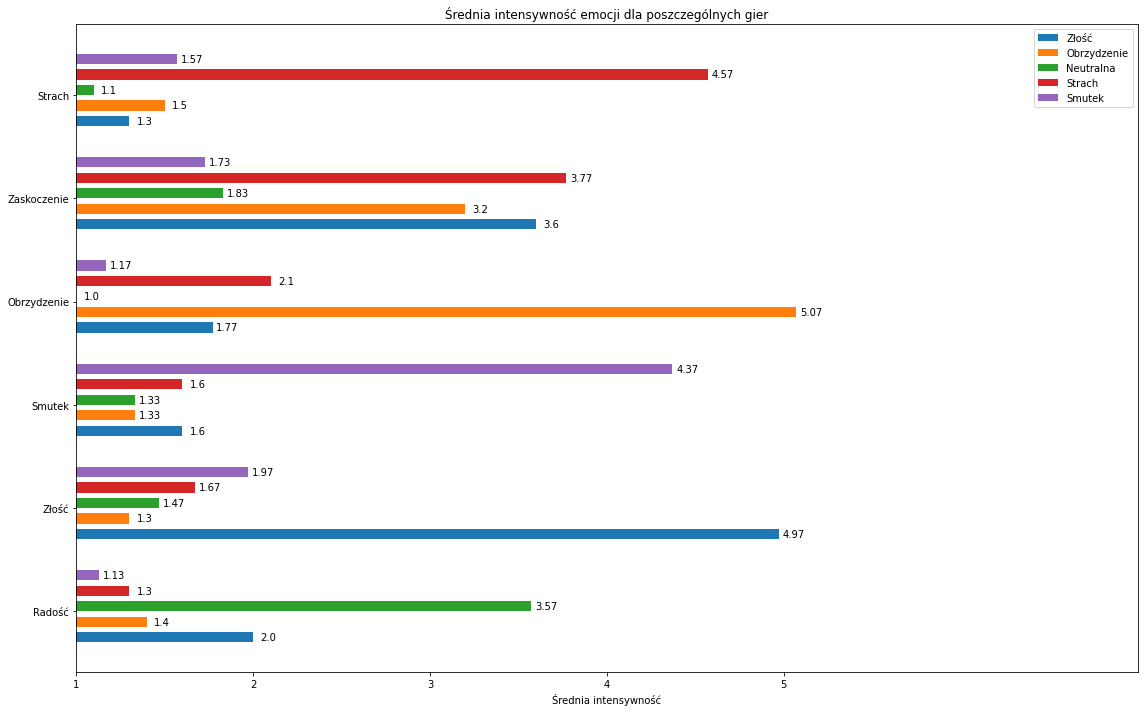

In [ ]:
width=0.5
padding = 0.05
offset = 0
x = np.arange(len(emocje))
fig, ax = plt.subplots(figsize=(16, 10))
for label in labels:

  rects = ax.barh((x-width/2) + offset, [df[label + ' - emocje'][emocja].mean().round(2) for emocja in emocje], width/5, label=label)
  autolabel(rects, ax)
  offset+=width/5 + padding

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Średnia intensywność')
ax.set_title('Średnia intensywność emocji dla poszczególnych gier')
ax.set_xticks(x)
ax.set_yticklabels([0, *emocje])
ax.legend()

fig.tight_layout()
plt.xlim((1,7))
plt.savefig('test.png', dpi=100)
plt.show()

In [ ]:
from google.colab import files
files.download("test.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
geq = ['Pozytywne', 'Negatywne', 'Zmęczenie', 'Rzeczywistość']
labels = ['Złość', 'Obrzydzenie', 'Neutralna', 'Strach', 'Smutek']

<Figure size 432x288 with 0 Axes>

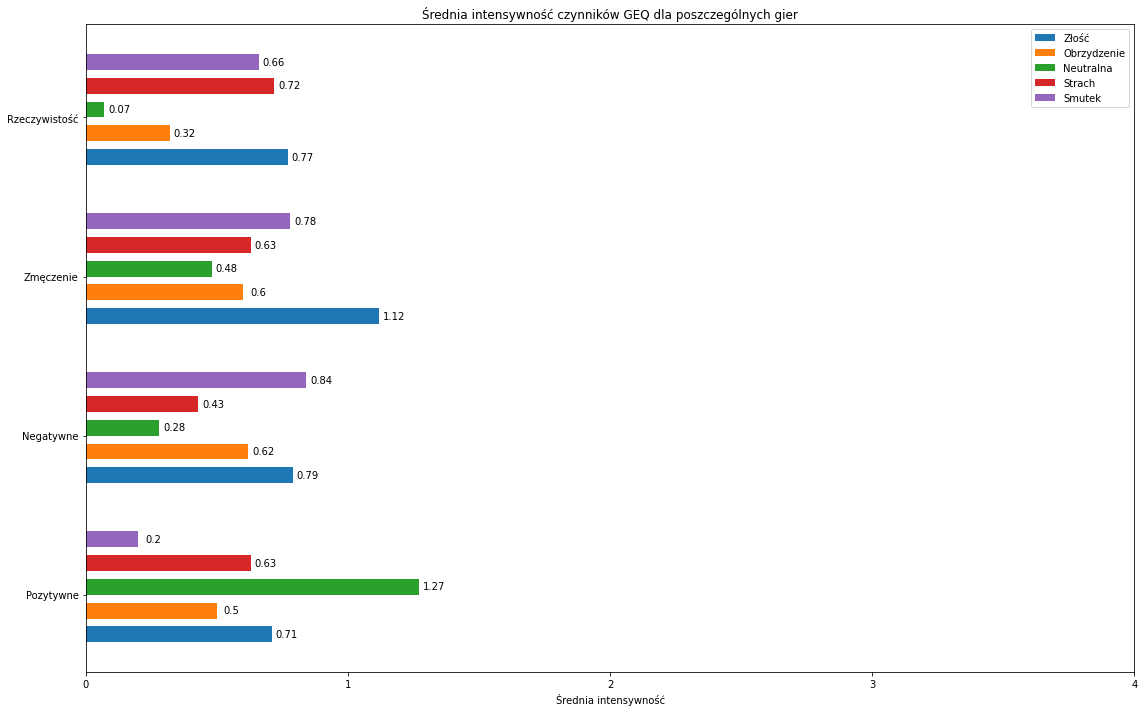

In [ ]:
width=0.5
padding = 0.05
offset = 0
plt.figure(1)
x = np.arange(len(geq))
fig, ax = plt.subplots(figsize=(16, 10))
for label in labels:

  rects = ax.barh((x-width/2) + offset, [newFrame[label + ' - GEQ'][czynnik].mean().round(2) for czynnik in geq], width/5, label=label)
  autolabel(rects, ax)
  offset+=width/5 + padding

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Średnia intensywność')
ax.set_title('Średnia intensywność czynników GEQ dla poszczególnych gier')
ax.set_xticks([0,1,2,3,4])
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(geq)
ax.legend()

fig.tight_layout()
plt.savefig('test2.png', dpi=100)
plt.show()

In [ ]:
files.download("test2.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>